# Problem Statement

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able **to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to **understand the demand for shared bikes among the people** after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- **Which variables are significant in predicting the demand for shared bikes.**
- **How well those variables describe the bike demands**

# Step 1: Reading and understanding the data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Reading the data 
bike = pd.read_csv("day.csv",  engine='python')

In [4]:
bike.head ()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 2: Data Cleaning and manupulation


In [8]:
bike = bike.drop(['instant', 'dteday','casual','registered','holiday'], axis= 1) 
bike.head ()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# here our first concern is to convert 'season','mnth','weathersit' and 'weekday'

bike['season']=bike.season.map({1:'spring', 2:'summer',3:'fall', 4:'winter'})
bike['mnth']=bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike['yr']=bike.yr.map({0:'2018',1:'2019'})
bike['workingday']=bike.workingday.map({0:'holiday/weekend',1:'workday'})

In [10]:
bike.head ()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,Sat,holiday/weekend,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,Sun,holiday/weekend,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,Mon,workday,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,Tue,workday,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,Wed,workday,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 3: Visualizing the data


Visualizing the data will help o determine the outcome and will able to detect the true predictors and its association with the outcome variable 

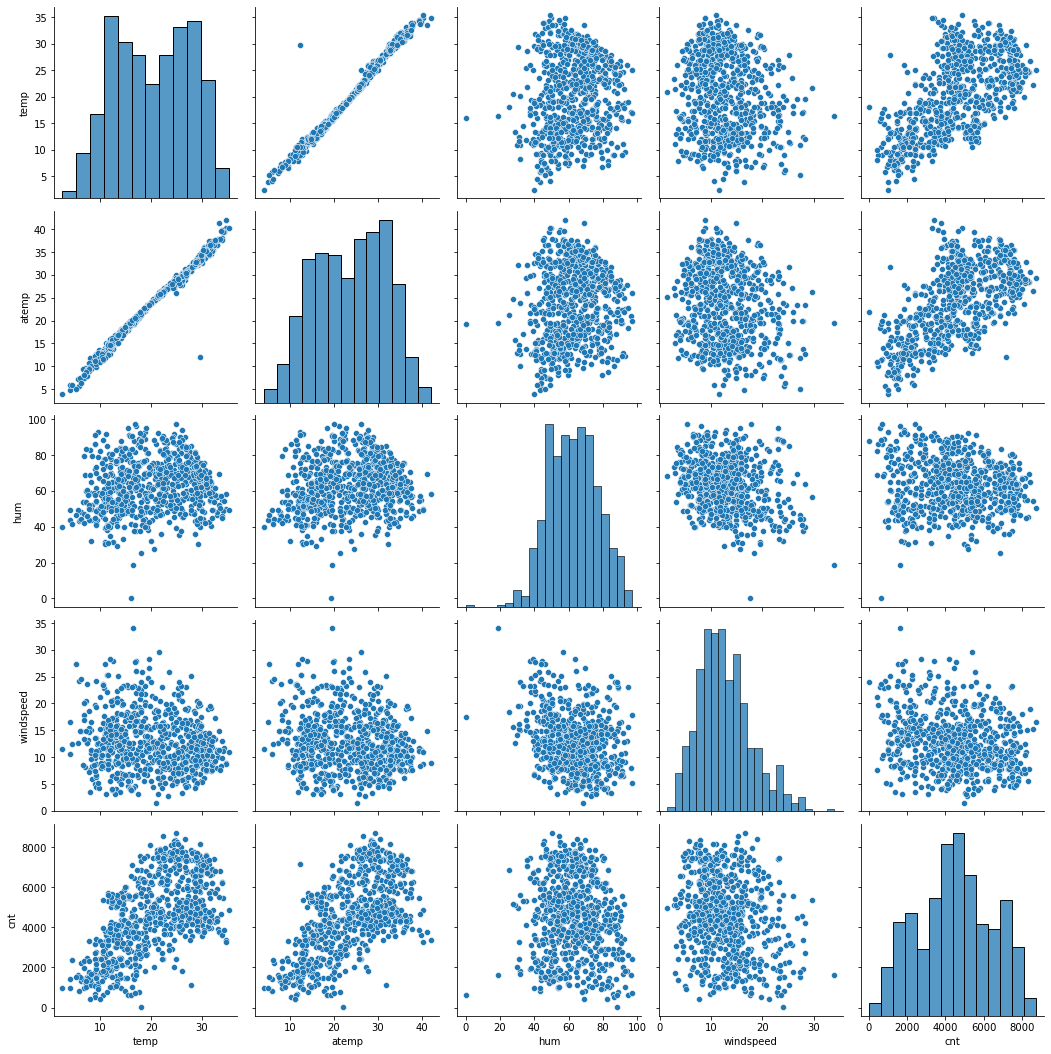

In [11]:
# Using Seaborn and matplotlib a pair plot is constructed 
b= sns.pairplot (bike)
b.fig.set_size_inches(15,15)
plt.show ()

#### From the above pairplot we can conclude 
- atemp and temp are highly correlated, so we can drop one of them 

In [12]:
bike = bike.drop('atemp', axis= 1) 
bike.head ()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,Sat,holiday/weekend,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,Sun,holiday/weekend,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,Mon,workday,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,Tue,workday,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,Wed,workday,Clear,9.305237,43.6957,12.522300,1600


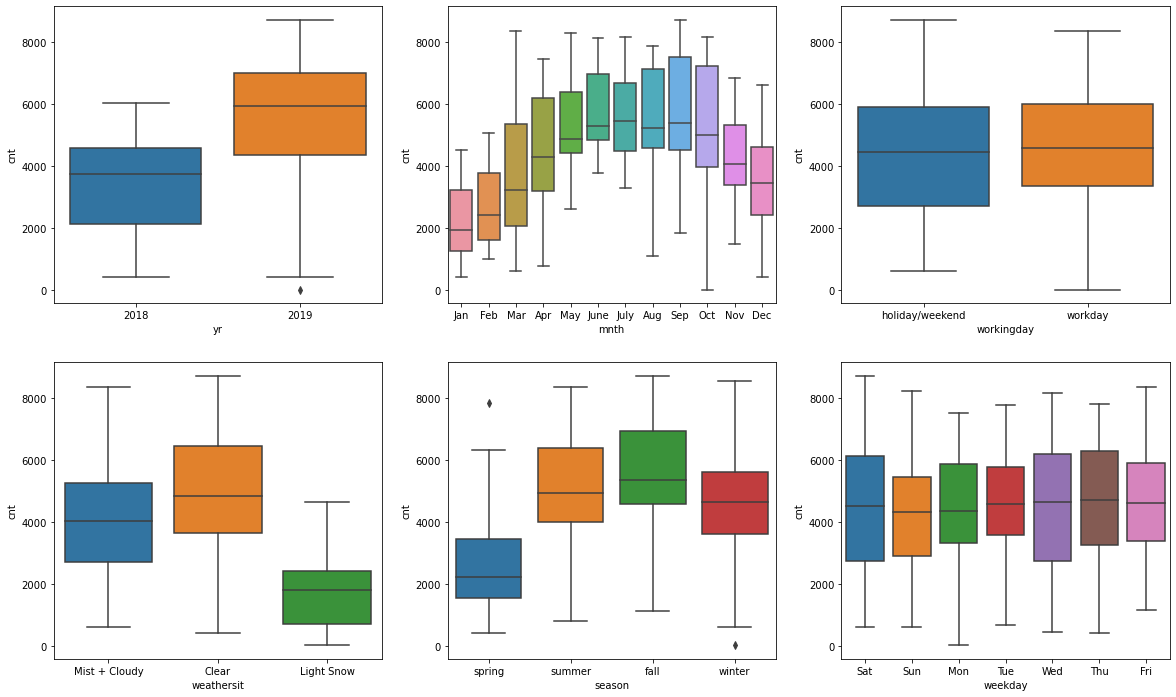

In [13]:
#Visualizing the categorical data

plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)

plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)

plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)

plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

plt.subplot(2,3,5)
sns.boxplot(x = 'season', y = 'cnt', data = bike)

plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)

plt.show()


## From the above figure we can derive that- 
- In the year 2019 the rentals were high 
- From May - August there is an increase in the rentals
- Summer and the fall season the rentals aer high
- Clear weather bags the highest rental counts 
- The rentals are slightly higher for the workday
- The rental counts do not vary much in the weekdays 

In [14]:
#Dropping the weekday day coloumn as its not showing much variation against renal count
bike = bike.drop('weekday', axis= 1) 
bike.head ()

,season,yr,mnth,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,holiday/weekend,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,holiday/weekend,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,workday,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,workday,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,workday,Clear,9.305237,43.6957,12.522300,1600


<AxesSubplot:>

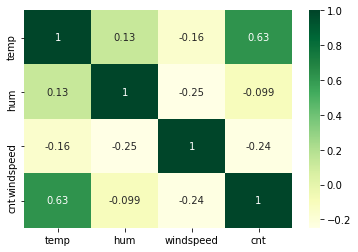

In [15]:
sns.heatmap (bike.corr(),annot = True, cmap="YlGn")

### Observation

- The correllation between the temperature and rental counts is the highest 

# Step 4 : Data preperation

### A. Create Dummy Variables
### B. Divide the dataframe into train and test set
### C. Preform scaling 
### D. Distribute variables into dependent and independent variables 

### <font color='red'>A. Create Dummy Variables</font>
For the categorical variables-
- yr
- mnth
- workingday
- weathersit
- season

In [16]:
# Let's drop the first column from status df using 'drop_first = True'

year = pd.get_dummies(bike['yr'], drop_first = True)

# Add the results to the original bike dataframe

bike = pd.concat([bike, year], axis = 1)

In [17]:
# Let's drop the first column from status df using 'drop_first = True'

season = pd.get_dummies(bike['season'], drop_first = True)

# Add the results to the original bike dataframe

bike = pd.concat([bike, season], axis = 1)

In [18]:
# Let's drop the first column from status df using 'drop_first = True'

month = pd.get_dummies(bike['mnth'], drop_first = True)

# Add the results to the original bike dataframe

bike = pd.concat([bike, month], axis = 1)

In [19]:
# Let's drop the first column from status df using 'drop_first = True'

work_day = pd.get_dummies(bike['workingday'], drop_first = True)

# Add the results to the original bike dataframe

bike = pd.concat([bike, work_day], axis = 1)

In [20]:
# Let's drop the first column from status df using 'drop_first = True'

weather = pd.get_dummies(bike['weathersit'], drop_first = True)

# Add the results to the original bike dataframe

bike = pd.concat([bike, weather], axis = 1)

In [21]:
bike.head ()

,season,yr,mnth,workingday,weathersit,temp,hum,windspeed,cnt,2019,...,July,June,Mar,May,Nov,Oct,Sep,workday,Light Snow,Mist + Cloudy
0,spring,2018,Jan,holiday/weekend,Mist + Cloudy,14.110847,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,1
1,spring,2018,Jan,holiday/weekend,Mist + Cloudy,14.902598,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,1
2,spring,2018,Jan,workday,Clear,8.050924,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,1,0,0
3,spring,2018,Jan,workday,Clear,8.200000,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,workday,Clear,9.305237,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,1,0,0


#### Rows dropped to avoind run code error (as the engine is getting confused between the inputs)

In [22]:
bike = bike.drop(['season'], axis =1)

In [23]:
bike = bike.drop(['mnth'], axis =1)

In [24]:
bike = bike.drop(['workingday'], axis =1)

In [25]:
bike = bike.drop(['weathersit'], axis =1)

In [26]:
bike.shape

(730, 23)

### <font color='red'>B. Divide the dataframe into train and test set</font>

In [27]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.75, test_size = 0.25, random_state = 100)

### <font color='red'>C. Preform scaling </font>

In [28]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [29]:
df_train.head()

,yr,temp,hum,windspeed,cnt,2019,spring,summer,winter,Aug,...,July,June,Mar,May,Nov,Oct,Sep,workday,Light Snow,Mist + Cloudy
311,2018,0.435124,0.743667,0.057471,0.481247,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
523,2019,0.735215,0.482181,0.286093,0.887483,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
381,2019,0.391151,0.737917,0.659615,0.335136,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
413,2019,0.358285,0.550880,0.319514,0.494248,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,2018,0.740406,0.735509,0.156398,0.578003,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
df_train.columns

Index(['yr', 'temp', 'hum', 'windspeed', 'cnt', '2019', 'spring', 'summer',
       'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'workday', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

### <font color='red'>D. Distribute variables into dependent and independent variables</font>

In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

# Step 5 : Data modeling and Evaluation

### A. Create Linear Regression Model (using mixed approaches; RFE, VIF/P-value)
### B. Check the adjusted R-sq & VIF/Pvalue
### C. Check various assumptions
### D. Check adjusted R-squared for both the test data 
### E. Report final model 


This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with <b>RFE</b> (which is a utility from sklearn)

# RFE
Recursive feature elimination

In [32]:

# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('2019', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', True, 1),
 ('Mar', False, 2),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 3),
 ('Sep', True, 1),
 ('workday', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [34]:
col = X_train.columns[rfe.support_]#coloums which rfe approves to be true 
col

Index(['yr', 'temp', 'hum', 'windspeed', '2019', 'spring', 'summer', 'winter',
       'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'May', 'Nov', 'Sep',
       'workday', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['Mar', 'Oct'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [36]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [37]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [38]:
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()   # Running the linear model

In [39]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     153.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.26e-200
Time:                        02:07:30   Log-Likelihood:                 553.75
No. Observations:                 547   AIC:                            -1068.
Df Residuals:                     527   BIC:                            -981.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0001   3.89e-06    -29.213

#### <font color='blue'>1. As per observation months : may, june, july, aug is showing high p-value</font>
#### <font color='blue'>2. As per observation seasons: summer, winter is giving high p-values</font>
#### <font color='blue'>Before decidng to drop the variabes, lets check the VIFs to confirm their validity</font>

In [40]:
# Calculate the VIFs for the model

vif = pd.DataFrame()
X = X_train_rfe.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,2019,inf
1,yr,inf
6,spring,9.48
8,winter,6.98
7,summer,6.76
2,temp,6.64
9,Aug,4.65
13,July,4.12
17,Sep,2.91
12,Jan,2.42


### <font color='blue'> The stark factor is, the variable yr and 2019 shows a perfect multicllenearity where the value of r is 1, hence the VIF is inf ie infinite 

In [41]:
X_train_new = X_train_rfe.drop(["May", "June", "July", "Aug", "spring", "yr", "const"], axis = 1)

Rebuilding the model without may, june, july, aug, spring and yr 

In [42]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [43]:
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()   # Running the linear model

In [44]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.2
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          6.34e-203
Time:                        02:07:35   Log-Likelihood:                 545.67
No. Observations:                 547   AIC:                            -1061.
Df Residuals:                     532   BIC:                            -996.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2596      0.031      8.457

 <font color='red'>It did not change the R value drastically, Previously it was 0.847 now it is 0.842</font>

In [45]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_lm.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,62.97
1,temp,2.75
9,Jan,2.22
6,winter,2.12
2,hum,1.91
8,Feb,1.73
10,Nov,1.70
7,Dec,1.66
14,Mist + Cloudy,1.57
5,summer,1.56


### <font color='blue'> So dropping the coloumn yr, did perfect the VIF score of 2019

In [46]:
X_train_lm.columns

Index(['const', 'temp', 'hum', 'windspeed', '2019', 'summer', 'winter', 'Dec',
       'Feb', 'Jan', 'Nov', 'Sep', 'workday', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

<font color='red'>Well, we are none of the VIFs look troublesome, hence moving forward with the model</font>

## Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [47]:
y_train_cnt = lm.predict(X_train_lm.astype(float))

Text(0.5, 0, 'Errors')

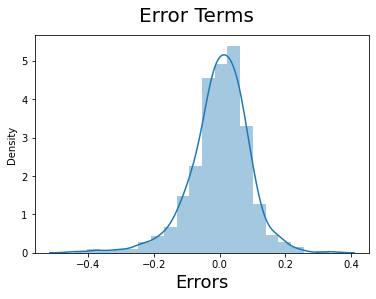

In [48]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<font color='red'>Well, we are none of the VIFs look troublesome, hence moving forward with the model</font>

## Making Predictions

#### Applying scaling to the test set 

In [49]:
# Apply scaler() to all the columns except the'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [50]:
y_test = df_test.pop('cnt')
X_test = df_test

In [51]:
# Now let's use our model to make predictions.

# Adding a constant variable 
X_test = sm.add_constant(X_test)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm.columns]

In [52]:
# Making predictions
y_test_pred = lm.predict(X_test_new.astype(float))

## Model Evaluation

Text(0, 0.5, 'y_pred')

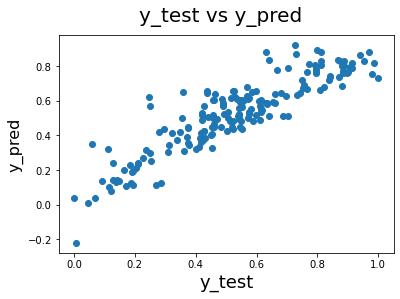

In [53]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [54]:
#evalute the model, r squared in the test
r2= r2_score (y_true = y_test, y_pred = y_test_pred)
r2

0.8034171454098678

In [55]:
lm.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.2
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          6.34e-203
Time:                        02:07:48   Log-Likelihood:                 545.67
No. Observations:                 547   AIC:                            -1061.
Df Residuals:                     532   BIC:                            -996.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2596      0.031      8.457      0.000       0.199       0.320
temp              0.4950      0.028     17.374      0.000       0.439       0.551
hum              -0.1566      0.037     -4.233      0.000      -0.229      -0.084
windspeed        -0.1870      0.025     -7.511      0.000      -0.236      -0.138
2019              0.2284      0.008     29.030      0.000       0.213       0.244
summer            0.0713      0.011      6.355      0.000       0.049       0.093
winter            0.1448      0.013     11.062      0.000       0.119       0.170
Dec              -0.0586      0.018     -3.332      0.001      -0.093      -0.024
Feb              -0.0517      0.020     -2.642      0.008      -0.090      -0.013
Jan              -0.0754      0.020     -3.736      0.000      -0.115      -0.036
Nov              -0.0544      0.018     -2.964      0.003      -0.090      -0.018
Sep               0.0889      0.015      5.790      0.000       0.059       0.119
workday           0.0265      0.008      3.208      0.001       0.010       0.043
Light Snow       -0.2507      0.026     -9.490      0.000      -0.303      -0.199
Mist + Cloudy    -0.0535      0.010     -5.259      0.000      -0.073      -0.034
==============================================================================
Omnibus:                       85.168   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.319
Skew:                          -0.778   Prob(JB):                     7.17e-50
Kurtosis:                       5.741   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the equation of our best fitted line is:

cnt = 0.4950×temp - 0.1566×hum - 0.1870×windspeed + 0.2283×(2019)+ 0.0713×summer + 0.1448×winter - 0.1448×winter - -0.0586×Dec -0.0517× Feb

Overall we have a decent model, but we also acknowledge that we could do better.